In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("digit.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
import matplotlib.pyplot as plt

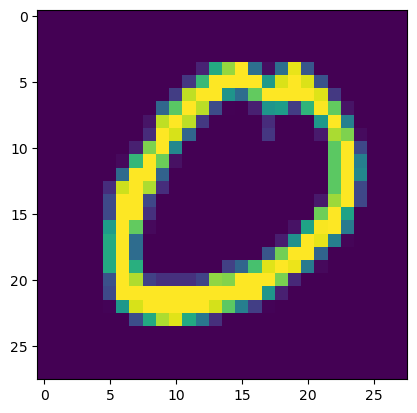

In [7]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [10]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [11]:
x_train.shape

(33600, 784)

In [12]:
x_test.shape

(8400, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()

In [15]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
import time
start = time.time()
y_predict = knn.predict(x_test)
print(time.time()-start)

12.03241229057312


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,y_predict)

0.9636904761904762

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scalar = StandardScaler()

In [21]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [22]:
from sklearn.decomposition import PCA

In [28]:
a=[]
for i in range(1,15):
    pca = PCA(n_components=i)
    x_train_sc = pca.fit_transform(x_train)
    x_test_sc = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_sc,y_train)
    y_predict = knn.predict(x_test_sc)
    a.append(accuracy_score(y_test,y_predict))

<Axes: >

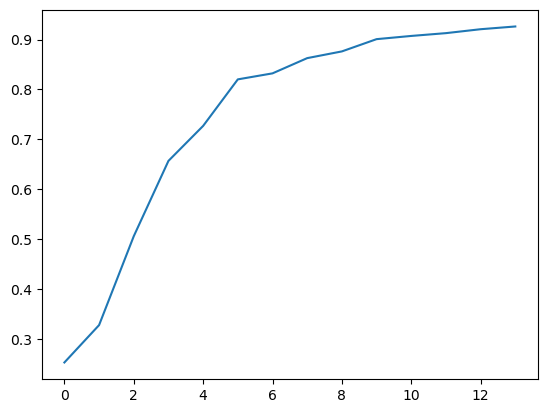

In [26]:
import seaborn as sns
sns.lineplot(data=a)